<a href="https://colab.research.google.com/github/alklyatov/ML-DL_LR/blob/main/LR_2_Klyatov_Shilov.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Отчет по лабораторной работе № 2**

Выполнили студенты группы ИУ10-91: \
Клятов Алексей,
Шилов Елисей







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(10, 10) # зададим размер картинки

data = pd.read_csv('/content/NetflixOriginals.csv', sep=',',encoding='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Подготовка данных: удаление лишних столбцов, замена признака "Язык" на количество фильмов, принадлежащих определенной категории этого признака, замена даты выпуска киноленты на год, выделение целевой переменной (рейтинг фильма в булевом виде, 1 - если рейтинг > 6, и 0 в противном случае) и разделение ее на тренировочную и тестовую:

In [ ]:
data = data.drop(['Title','Genre'],axis = 'columns')

import re
premier = data['Premiere']
for i in range(len(premier)):
  premier[i] = int(re.sub('.+ \d+. ', '', str(premier[i])))
data['Premiere'] = data['Premiere'].astype('int')

rating = data['IMDB Score']
for i in range (len(rating)):
  if rating[i] >= 6: rating[i] = 1
  else: rating[i] = 0
data['IMDB Score'] = data['IMDB Score'].astype('int')

X = data[data.columns[[0, 1, 3]]]
y = data['IMDB Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

from collections import Counter
counter = Counter(X_train['Language'])

def get_count(Language):
    return counter.get(Language, 0)

X_train.loc[:, 'Language'] = X_train['Language'].apply(get_count)
X_test.loc[:, 'Language'] = X_test['Language'].apply(get_count)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 257 to 102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Premiere  438 non-null    int64 
 1   Runtime   438 non-null    int64 
 2   Language  438 non-null    object
dtypes: int64(2), object(1)
memory usage: 13.7+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Посмотрим на распределения и возможные зависимости признаков. 
Зависимость оценки IMDB от года выхода сериала:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


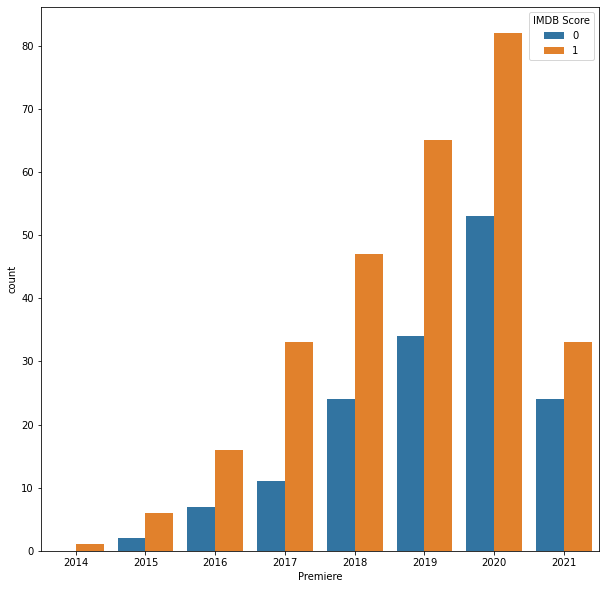

In [ ]:
sns.countplot(X_train['Premiere'], hue=y_train)

Зависимость оценки на IMDb от языка, на котором снят сериал:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


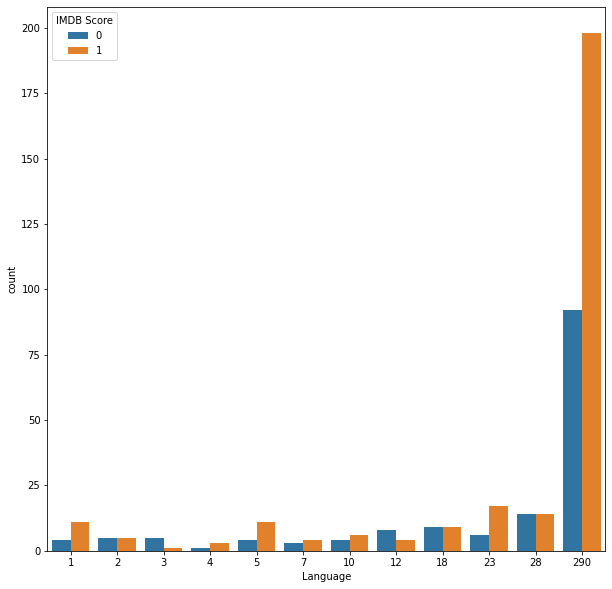

In [ ]:
sns.countplot(X_train['Language'], hue=y_train)

Зависимость оценки на IMDb от длительности сериала:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


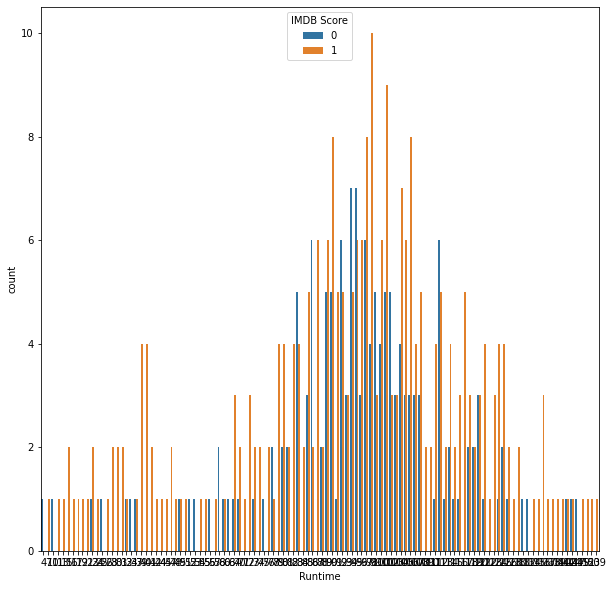

In [ ]:
sns.countplot(X_train['Runtime'], hue=y_train)

Мы получили довольно наглядную картину. Теперь посмотрим на зависимость признаков относительно друг друга:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


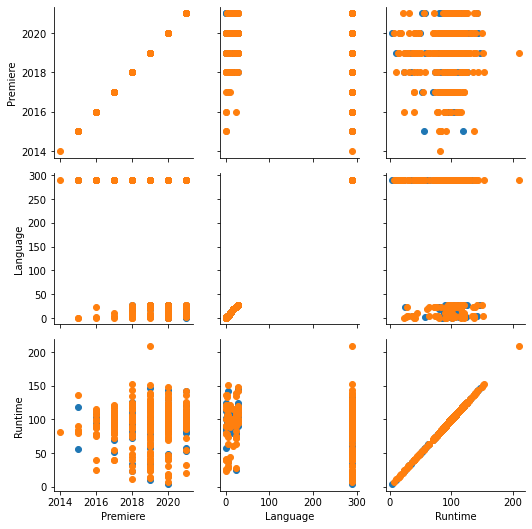

In [ ]:
df_for_pairgrid = X_train[['Premiere', 'Language', 'Runtime']]
df_for_pairgrid['IMDB Score'] = y_train

sns.PairGrid(df_for_pairgrid, hue='IMDB Score').map(plt.scatter)

На данном этапе можно сделать некоторые выводы, например, что сериалов с каждым годом становилось больше, при этом их "качество" (отношение сериалов с оценками > 6 к < 6 принципиально не менялось.

Плотность распределения величины "Длительность сериала":

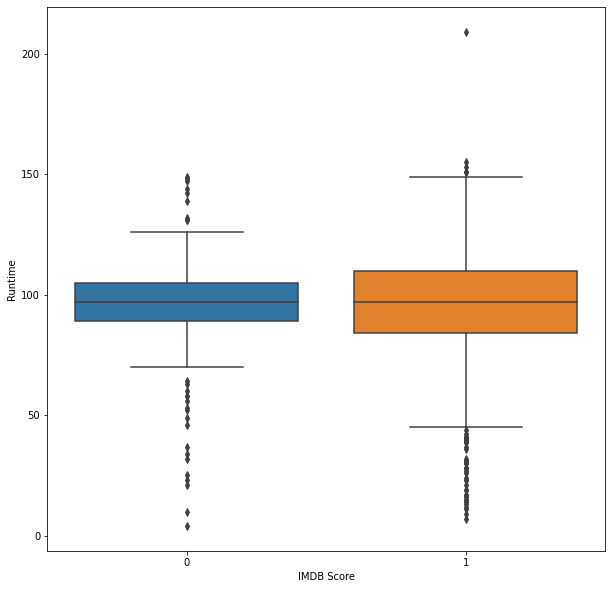

In [ ]:
runtime = pd.read_csv('/content/NetflixOriginals.csv', sep=',' ,encoding='latin-1')['Runtime'].apply(lambda x: x if x >= 0 else x / 5000)
sns.boxplot(x=y, y=runtime)

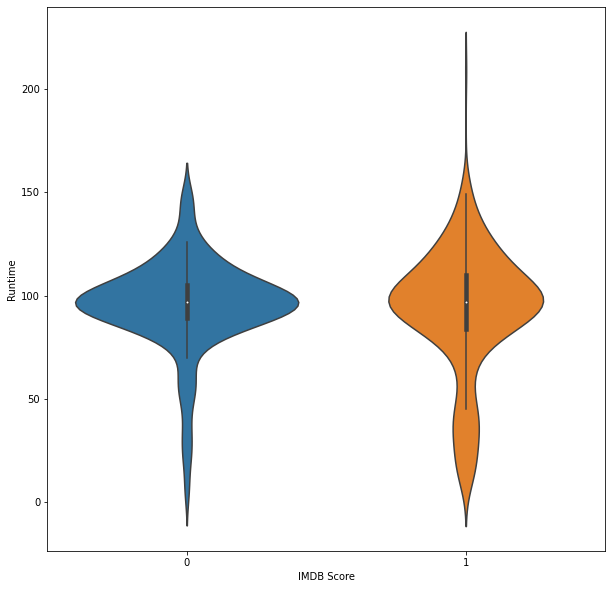

In [ ]:
sns.violinplot(x=y, y=runtime)

Нормализация:

Качество алгоритма до нормализации: 0.5068493150684932
Качество алгоритма после нормализации: 0.5753424657534246


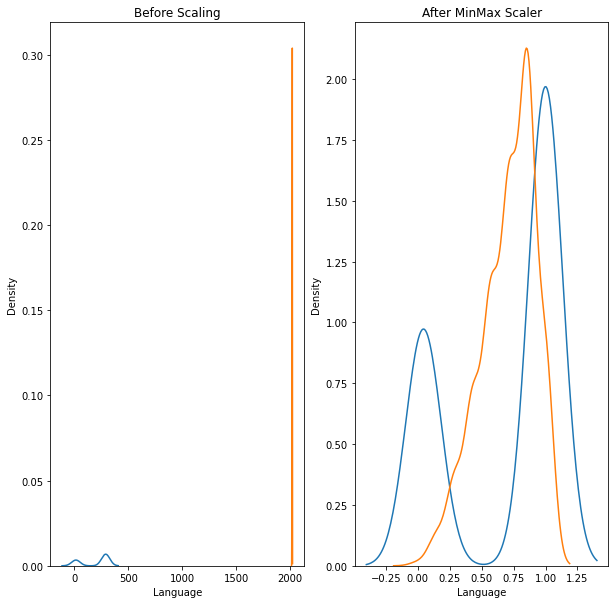

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Language'], ax=ax1)
sns.kdeplot(X_train['Premiere'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['Language'], ax=ax2)
sns.kdeplot(X_train_scaled['Premiere'], ax=ax2)
plt.show()

Качество алгоритма восросло после нормализации.

Перейдем к подбору алгоритма машинного обучения. Выбраны алгоритмы, которые могут работать с float (рейтинг фильма указывается в виде десятичной дроби, поэтому нужно использовать именно их).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.5684931506849316
SGDClassifier 0.6438356164383562
SVC 0.6438356164383562
GaussianNB 0.636986301369863
KNeighborsClassifier 0.6712328767123288


Алгоритм ближайших соседей KNeighborsClassifier оказалася наиболее эффективным.

Стратификация:

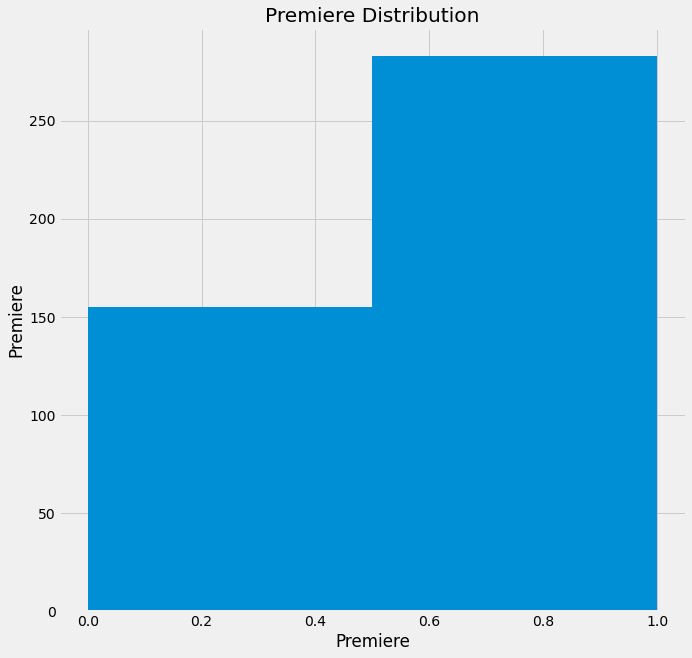

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel('Premiere'); plt.ylabel('Premiere');
plt.title('Premiere Distribution');

In [ ]:
from sklearn.metrics import accuracy_score

a = np.ones(y_test.shape[0])
accuracy_score(y_test, a)

0.6438356164383562

Увеличим количество примеров из недоминантного класса.

In [ ]:
X_train_scaled.reset_index(inplace=True, drop=True)
y_train.reset_index(drop=True, inplace=True)

rating = X_train_scaled[y_train == 0]
X_train_strat = pd.concat([X_train_scaled, rating, rating], ignore_index=True)
y_train_strat = pd.concat([y_train, pd.Series(np.ones(X_train_strat.shape[0]-X_train_scaled.shape[0]))],
                          ignore_index=True)

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_strat, y_train_strat).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.6438356164383562
SGDClassifier 0.6438356164383562
SVC 0.6438356164383562
GaussianNB 0.6438356164383562
KNeighborsClassifier 0.6438356164383562


Метрики качества:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, beta=0.5))
print('F2:', fbeta_score(y_test, a, beta=2))

Accuracy: 0.6438356164383562
Precision: 0.6438356164383562
Recall: 1.0
ROC AUC: 0.5
PRC AUC: 0.821917808219178
F1: 0.7833333333333334
F0.5: 0.6932153392330382
F2: 0.900383141762452
